# PS2: Computing the Probability of Profit using Single Asset GBM models

[Geometric Brownian motion (GBM)](https://en.wikipedia.org/wiki/Geometric_Brownian_motion) is a continuous-time stochastic process model in which the random variable $S(t)$, e.g., the share price of `XYZ` is described by a deterministic drift corrupted by a [Wiener process](https://en.wikipedia.org/wiki/Wiener_process):

$$\frac{dS}{S} = {\mu}dt + \sigma{dW}$$

The constant $\mu$ denotes a drift parameter, $\sigma$ indicates a volatility parameter, and $dW$ represents the output of a [Wiener process](https://en.wikipedia.org/wiki/Wiener_process).  Using [Ito's lemma](https://en.wikipedia.org/wiki/Itô%27s_lemma), we can formulate an analytical solution to the GBM equation:

$$S(t) = S_{\circ}\exp\Biggl[\left(\mu-\frac{\sigma^{2}}{2}\right)\left(t - t_{\circ}\right) + (\sigma\sqrt{t-t_{\circ}})\cdot{Z_{t}(0,1)}\Biggr]$$

where $S_{\circ}$ denotes the share price at $t_{\circ}$, and $Z_{t}(0,1)$ denotes a [standard normal random variable](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution) at time $t$.

## Learning objectives
This problem set will help students understand how to estimate the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) of fractional returns using the analytical solution to the geometric Brownian motion (GBM) model. By doing so, we can get an idea of the probability of achieving a specific fractional return within a set time frame based on a future predicted using the GBM model. 

## Setup

In [1]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/PS2-CHEME-5660-GBM-POP-Fall-2023/Project.toml`
  No Changes to `~/Desktop/julia_work/PS2-CHEME-5660-GBM-POP-Fall-2023/Manifest.toml`
  Activating project at `~/Desktop/julia_work/PS2-CHEME-5660-GBM-POP-Fall-2023`
  No Changes to `~/Desktop/julia_work/PS2-CHEME-5660-GBM-POP-Fall-2023/Project.toml`
  No Changes to `~/Desktop/julia_work/PS2-CHEME-5660-GBM-POP-Fall-2023/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
  No Changes to `~/Desktop/julia_work/PS2-CHEME-5660-GBM-POP-Fall-2023/Project.toml`
  No Changes to `~/Desktop/julia_work/PS2-CHEME-5660-GBM-POP-Fall-2023/Manifest.toml`


### Packages
The `Include.jl` file loads several packages that we use'll for our exercises:
* [Dates.jl](https://docs.julialang.org/en/v1/stdlib/Dates/#Dates)  is a package included with the standard library which provides basic functionality for working dates.
* [DataFrames.jl](https://dataframes.juliadata.org/stable/) and [CSV.jl](https://github.com/JuliaData/CSV.jl) provide a set of tools for working with tabular data in [Julia](https://julialang.org). Its design and functionality are similar to those of [Pandas (in Python)](https://pandas.pydata.org) and [data.frame, data.table and dplyr (in R)](https://dplyr.tidyverse.org), making it an excellent general-purpose data science tool.
* [Distributions.jl](https://github.com/JuliaStats/Distributions.jl) is a [Julia](https://julialang.org) package for probability distributions and associated functions.
* [PrettyTables.jl](https://ronisbr.github.io/PrettyTables.jl/stable/man/html_backend/) is a [Julia](https://julialang.org) package that implements functions to construct and display text-based tables
* [Plots.jl](https://docs.juliaplots.org/stable/) is a plotting library, and [Colors.jl](https://github.com/JuliaGraphics/Colors.jl) is a color library that we'll use for data visualization in [Julia](https://julialang.org).
* [LinearAlgebra.jl](https://github.com/JuliaLang/LinearAlgebra.jl) is a package that provides functionality for working with linear algebra in [Julia](https://julialang.org).
* [Statistics.jl](https://docs.julialang.org/en/v1/stdlib/Statistics/#Statistics) is a package included with the standard library module, which contains basic statistics functionality

### Types
`Include.jl` loads some [problem-specific types](https://docs.julialang.org/en/v1/manual/types/#Composite-Types) that will be helpful for the geometric Brownian motion simulation of equity share prices.

The mutable struct `MyGeometricBrownianMotionEquityModel`, which holds the parameters associated with the geometric Brownian motion simulation, has two fields:
* The `μ::Float64` field holds the drift or growth parameter for the model
* The `σ::Float64` field holds the volatility parameter for the model

### Functions
The `Include.jl` file also loads the following [Julia functions](https://docs.julialang.org/en/v1/manual/functions/):

`function build(model::Type{MyGeometricBrownianMotionEquityModel}, data::NamedTuple) -> MyGeometricBrownianMotionEquityModel` 
> The `build)(...)` function takes information in the `data` [NamedTuple](https://docs.julialang.org/en/v1/base/base/#Core.NamedTuple) argument (the $(\mu, \sigma)$ values) and returns an instance of the `MyGeometricBrownianMotionEquityModel` [mutable type](https://docs.julialang.org/en/v1/manual/types/#Mutable-Composite-Types). 

`function sample(model::MyGeometricBrownianMotionEquityModel, data::NamedTuple; number_of_paths::Int64 = 100) -> Array{Float64,2}`
> The `sample(...)` function takes a `MyGeometricBrownianMotionEquityModel` instance, and information in the `data` [NamedTuple](https://docs.julialang.org/en/v1/base/base/#Core.NamedTuple) argument and solves the geometric Brownian motion model for `number_of_paths` (default: 100) trials. The `data` argument holds the initial share price `Sₒ::Float64`, the initial and final times for the simulation `T₁` and `T₂` respectively (both are `Float64` types), and the simulation time step `Δt::Float64`.

`function 𝔼(model::MyGeometricBrownianMotionEquityModel, data::NamedTuple) -> Array{Float64,2}`
> The `𝔼(...)` functions takes a `MyGeometricBrownianMotionEquityModel` instance and information in the `data` [NamedTuple](https://docs.julialang.org/en/v1/base/base/#Core.NamedTuple) argument and computes the expectation of the share price as a function of time. The expectation is returned as a `T`$\times$`2` array where the first column holds the time values while the second column holds the expected share price. The `data` argument holds the initial share price `Sₒ::Float64`, the initial and final times for the simulation `T₁` and `T₂` respectively (both are `Float64` types), and the simulation time step `Δt::Float64`.

`function Var(model::MyGeometricBrownianMotionEquityModel, data::NamedTuple) -> Array{Float64,2}`
> The `Var(...)` function takes a `MyGeometricBrownianMotionEquityModel` instance and information in the `data` [NamedTuple](https://docs.julialang.org/en/v1/base/base/#Core.NamedTuple) argument and computes the variance of the share price as a function of time. The variance is returned as a `T`$\times$`2` array where the first column holds the time values while the second column holds the share price variance. The `data` argument holds the initial share price `Sₒ::Float64`, the initial and final times for the simulation `T₁` and `T₂` respectively (both are `Float64` types), and the simulation time step `Δt::Float64`.

### Constants
Let's set some constant values that we will use below:

In [35]:
Δt = (1.0/252.0); # default timestep: 1-trading day in units of years
T = 48; # number of trading days for our projection
number_of_trading_days = 194; # number of trading days in the 2023 sample
number_of_sample_paths = 10000; # number of sample paths that we used to calculate to sample the model
all_range = range(1,stop=number_of_trading_days,step=1) |> collect; # range of possible time steps

### Setup the $\beta$-array
We'll simulate a range of perturbation values between a lower bound $\beta_{1}$ and an upper bound $\beta_{2}$, where we specify the number of test points between $\beta_{1}\rightarrow\beta_{2}$. We save this array in the `β` variable:

In [34]:
number_of_test_points = 100;
β₁ = 0.8;
β₂ = 1.2;
β = range(β₁,stop=β₂, length=number_of_test_points) |> collect;

### Prerequisite: Load GBM parameters and 2023 OHLC daily data
To test the model parameters we estimated in `Lab 7c`, we've downloaded a daily open-high-low-close `dataset` for each firm in the [S&P500](https://en.wikipedia.org/wiki/S%26P_500) for the 2023 year-to-date (`194` data points per firm). We filtered out firms that did not have complete data for the previous dataset. We load the 2023 price `dataset` by calling the `MyPortfolioDataSet()` function:

In [33]:
dataset = MyPortfolioDataSet() |> x-> x["dataset"];

Later, we'll be picking a random ticker, so let's save a sorted collection of ticker symbols in the `list_of_firms` variable:

In [5]:
list_of_firms = keys(dataset) |> collect |> sort;

#### Load parameters dataset
In addition, I've modified `Lab 7c` to save the estimated values for the drift and volatility parameters for each firm in our dataset. We load this data by calling the `MyFirmParametersDataSet()` function, and save these values in the `parameters` variable (which is type `DataFrame`):

In [6]:
parameters = MyFirmParametersDataSet();

## Task 1: Select a random firm, build a GBM model and simulate forward in time

In [8]:
random_firm_ticker = rand(list_of_firms)

"HOLX"

Now that we have a random firm ticker symbol, let's pull the data that corresponds to this ticker from the `dataset`, and save this in the `random_firm_data` variable (which is type `DataFrame`):

In [9]:
random_firm_data = dataset[random_firm_ticker]

194×8 DataFrame
 Row │ volume     volume_weighted_average_price  open     close    high     lo ⋯
     │ Float64    Float64                        Float64  Float64  Float64  Fl ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 1.55524e6                        75.29      75.08    75.55  75.75    74 ⋯
   2 │ 1.98505e6                        77.6645    76.1     78.23  78.29    75
   3 │ 1.77456e6                        77.439     77.62    77.63  78.23    76
   4 │ 2.14052e6                        77.7855    78.84    77.83  78.84    77
   5 │ 2.90537e6                        80.2363    79.58    79.79  81.97    78 ⋯
   6 │ 1.74318e6                        80.7339    80.0     80.57  81.43    79
   7 │ 2.81933e6                        81.0982    80.75    81.08  81.63    80
   8 │ 2.04028e6                        80.0296    81.28    79.87  81.28    79
   9 │ 1.29205e6                        79.923     79.42    79.95  80.3599  79 ⋯
  10 │ 1.65535e6                        79.5288    79.95    79.46  80.22    79
  11 │ 1.4228e6                         79.1408    79.55    78.92  79.95    78
  ⋮  │     ⋮                    ⋮                   ⋮        ⋮        ⋮        ⋱
 185 │ 1.78557e6                        69.5145    70.2     69.24  70.515   69
 186 │ 2.5311e6                         69.9513    69.35    70.05  70.36    69 ⋯
 187 │ 1.80979e6                        69.6337    70.18    69.4   70.34    69
 188 │ 1.64877e6                        68.7289    69.2     68.87  69.32    68
 189 │ 1.95818e6                        69.298     68.57    69.3   69.62    68
 190 │ 1.49848e6                        69.0139    69.48    69.17  69.69    68 ⋯
 191 │ 1.56484e6                        69.2942    69.23    69.39  69.64    68
 192 │ 1.52941e6                        69.7599    69.36    69.84  70.235   68
 193 │ 1.41638e6                        69.9952    69.44    70.25  70.39    69
 194 │ 1.70182e6                        70.8076    70.63    70.77  71.085   70 ⋯
                                                  3 columns and 173 rows omitted

In addition, let's pull the estimated values for the drift and volatility parameters from the `parameters` data structure, see the [filter command](https://dataframes.juliadata.org/stable/lib/functions/#Base.filter) exported by the [DataFrames.jl](https://github.com/JuliaData/DataFrames.jl.git) package for help with the syntax:

In [10]:
μ̂ = filter(:ticker=> x-> x == random_firm_ticker, parameters) |> x-> x[1,:drift]
σ̂ = filter(:ticker=> x-> x == random_firm_ticker, parameters) |> x-> x[1,:volatility];
println("Ticker $(random_firm_ticker) has (μ,σ) = ($(μ̂),$(σ̂))")

Ticker HOLX has (μ,σ) = (0.1583139453731215,0.28050874787846164)


Next, let's randomly choose a contiguous time window of `T` days and analyze the model’s performance during this period. To begin, we will generate the `start_index` variable, i.e., the trading index to start the simulation from. The `stop_index` will then be determined by adding the number of trading days `T` to the `start_index`:

In [11]:
start_index = rand(1:(number_of_trading_days - T - 1))
stop_index = start_index + T
println("Simulate Firm-$(random_firm_ticker) between trading days ($(start_index) -> $(stop_index))")

Simulate Firm-HOLX between trading days (89 -> 137)


Finally, let's create a geometric Brownian motion model, using the `build(…)` function and then solve it between `T₁` and `T₂` starting with price `Sₒ` using the `solve(…)` function. 
* In addition to the analytical values of the expectation and the variance, our simulation generates `N = 100` sample paths using the `sample(...)` function, where the resulting price values are saved in the `X` array. This array will be a `T`$\times$`N+1` array,  each row corresponds to a time value, while each column (after the first) is a solution:

In [12]:
model = build(MyGeometricBrownianMotionEquityModel, (
            μ = μ̂, σ = σ̂ ));

Sₒ = random_firm_data[start_index, :volume_weighted_average_price];
T₁ = start_index*Δt
T₂ = stop_index*Δt
X = sample(model, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt), 
    number_of_paths = number_of_sample_paths);

For Geometric Brownian Motion (GBM) analytical expressions are available for both the expected value and the variance of the share price. The expected share price is given by:

$$\mathbb{E}\left(S_{t}\right) = S_{o}\exp\left(\mu\cdot\Delta{t}\right)$$

where $\Delta{t} = t-t_{o}$ and $S_{o}$ denotes the share price at $t=t_{o}$. On the other hand the variance of the share price $\text{Var}(S_{t})$ at time $t$ is given by:

$$\text{Var}\left(S_{t}\right) = S_{\circ}^{2}e^{2\mu\cdot\Delta{t}}\left[e^{\sigma^{2}{\Delta{t}}} - 1\right]$$

We've implmented the analytical expectation and variance calculations in the `𝔼(...)` and `Var(...)` functions:

In [14]:
expectation = 𝔼(model, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt));
variance = Var(model, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt));

#### Visualize

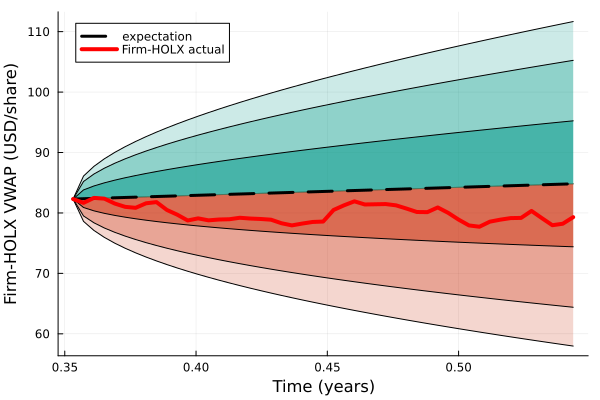

In [15]:
let
    L68 = expectation[:,2] .- sqrt.(variance[:,2])
    U68 = expectation[:,2] .+ sqrt.(variance[:,2])
    L95 = expectation[:,2] .- 1.96*sqrt.(variance[:,2])
    U95 = expectation[:,2] .+ 1.96*sqrt.(variance[:,2])
    L99 = expectation[:,2] .- 2.576*sqrt.(variance[:,2])
    U99 = expectation[:,2] .+ 2.576*sqrt.(variance[:,2])

    #plot(X[:,1],X[:,2:end], label="", c=colors[2], alpha=0.1)
 
    plot(expectation[:,1], expectation[:,2], fillrange=L68, c=colors[5], alpha=0.5, label="")
    plot!(expectation[:,1], expectation[:,2], fillrange=U68, c=colors[6], alpha=0.5, label="")
    plot!(expectation[:,1], expectation[:,2], fillrange=L95, c=colors[5], alpha=0.3, label="")
    plot!(expectation[:,1], expectation[:,2], fillrange=U95, c=colors[6], alpha=0.3, label="")
    plot!(expectation[:,1], expectation[:,2], fillrange=L99, c=colors[5], alpha=0.2, label="")
    plot!(expectation[:,1], expectation[:,2], fillrange=U99, c=colors[6], alpha=0.2, label="")

    plot!(expectation[:,1], expectation[:,2],c=:black, lw=3,ls=:dash, label="expectation")
    plot!(expectation[:,1], L68, c=:black, lw=1, label="")
    plot!(expectation[:,1], U68, c=:black, lw=1, label="")
    plot!(expectation[:,1], L95, c=:black, lw=1, label="")
    plot!(expectation[:,1], U95, c=:black, lw=1, label="")
    plot!(expectation[:,1], L99, c=:black, lw=1, label="")
    plot!(expectation[:,1], U99, c=:black, lw=1, label="")
    
    plot!(X[:,1], random_firm_data[start_index:stop_index, :volume_weighted_average_price], lw=4, c=:red, 
        label="Firm-$(random_firm_ticker) actual")
   
    xlabel!("Time (years)", fontsize=18)
    ylabel!("Firm-$(random_firm_ticker) VWAP (USD/share)", fontsize=18)
end

## TODO: Compute the cumulative distribution function at `T`
The cumulative distribution function $F_{X}(x)$ is defined as the probability that a random variable $X$ is less that or equal to a value $x$, i.e.,

$$
\begin{equation}
F_{X}(x) = P(X\leq{x})
\end{equation}
$$

This tells us the probability that our fractional return is less than a specified value, and $1 - F_{X}(x)$ tells us $P(X>x)$. 

We generated an array of samples using the geometric Brownian motion model, use this data to estimate the cumulative distribution function $F_{X}(x)$ for the fractional return of the random selected firm. Store these values in the `cumulative_probability` array; this is a `number_of_test_points` $\times$ `3` array where:

* `col 1` holds the fractional fraction return
* `col 2` holds an estimate of $P(X\leq{x})$
* `col 3` holds an estimate of $P(X>x)$

In [26]:
Y = X[end,2:end]; # last row of the sample array - what does this correspond to?
cumulative_probability = zeros(number_of_test_points, 3);
for i ∈ eachindex(β)
    β_value = β[i]
    test_value = Sₒ*β_value;
    
    # TODO: fill me in here.
end

In [ ]:
# Y = X[end,2:end];
# cumulative_probability = Array{Float64,2}(undef, number_of_test_points, 3);
# for i ∈ eachindex(β)
#     β_value = β[i]
    
#     test_value = Sₒ*β_value;
#     N₊ = 0;
#     for j ∈ 1:number_of_sample_paths
        
#         if (Y[j] <= test_value)
#             N₊ += 1
#         end
#     end
    
#     # compute the postive frequency 
#     cumulative_probability[i,1] = ((test_value - Sₒ)/(Sₒ));
#     cumulative_probability[i,2] = N₊/number_of_sample_paths;
#     cumulative_probability[i,3] = 1 - N₊/number_of_sample_paths;
# end

### Visualize

In [30]:
p = plot();
if (findall(x-> x!= 0.0,cumulative_probability) |> isempty == false)
    actual_close_vwap = random_firm_data[stop_index, :volume_weighted_average_price];
    actual_frac_return = ((actual_close_vwap - Sₒ)/Sₒ) |> x-> round(x,digits=3)
    plot!(cumulative_probability[:,1], cumulative_probability[:,2], c=:navyblue, lw=3, label="P(X ≤ x)")
    plot!(cumulative_probability[:,1], cumulative_probability[:,3], c=:red, lw=3, label="P(X>x)")
    VLINE = zeros(number_of_test_points,2);
    VLINE[:,1] .= actual_frac_return*ones(number_of_test_points);
    VLINE[:,2] .= range(0.0,1.0,length = number_of_test_points) |> collect;
    plot!(VLINE[:,1], VLINE[:,2],c=:gray69, ls=:dash, lw=2, label="Observed fractional return: $(actual_frac_return)")
    xlabel!("Fractional return $(random_firm_ticker) at T", fontsize=18)
    ylabel!("Probability", fontsize=18)
end